<a href="https://colab.research.google.com/github/Xeryto/anomaliesDetector/blob/main/Anomalies_clusterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
data1c = pd.read_csv('set1iter1pos1.csv', index_col=["epoch"])
data2c = pd.read_csv('3set1iter1pos1.csv', index_col=['epoch'])
data1w = pd.read_csv('2set1iter1pos1.csv', index_col=['epoch'])
data2w = pd.read_csv('4set1iter1pos1.csv', index_col=['epoch'])
final_data = {'w1_min': [min(data1c['w']), min(data2c['w']), min(data1w['w']), min(data2w['w'])], 'w2_min': [0, 0, 0, 0], 'x1_min': [min(data1c.x), min(data2c.x), min(data1w.x), min(data2w.x)], 'x2_min': [0, 0, 0, 0], 'y1_min': [min(data1c.y), min(data2c.y), min(data1w.y), min(data2w.y)], 'y2_min': [0, 0, 0, 0], 'z1_min': [min(data1c.z), min(data2c.z), min(data1w.z), min(data2w.z)], 'z2_min': [0, 0, 0, 0], 'w1_max': [max(data1c.w), max(data2c.w), max(data1w.w), max(data2w.w)], 'w2_max': [0, 0, 0, 0], 'x1_max': [max(data1c.x), max(data2c.x), max(data1w.x), max(data2w.x)], 'x2_max': [0, 0, 0, 0], 'y1_max': [max(data1c.y), max(data2c.y), max(data1w.y), max(data2w.y)], 'y2_max': [0, 0, 0, 0], 'z1_max': [max(data1c.z), max(data2c.z), max(data1w.z), max(data2w.z)], 'z2_max': [0, 0, 0, 0], 'cluster': [0, 2, 1, 3]}
df = pd.DataFrame(final_data)
df.head()

,w1_min,w2_min,x1_min,x2_min,y1_min,y2_min,z1_min,z2_min,w1_max,w2_max,x1_max,x2_max,y1_max,y2_max,z1_max,z2_max,cluster
0,0.751137,0,0.620587,0,-0.030296,0,-0.058945,0,0.781263,0,0.657092,0,0.186471,0,0.043415,0,0
1,0.686716,0,-0.557731,0,-0.075701,0,-0.472381,0,0.883315,0,0.518938,0,0.382847,0,-0.275361,0,2
2,0.695807,0,0.479724,0,0.085513,0,-0.346099,0,0.763095,0,0.691302,0,0.318328,0,0.115513,0,1
3,0.237132,0,0.726103,0,0.086686,0,-0.134029,0,0.650809,0,0.958340,0,0.196821,0,0.124164,0,3


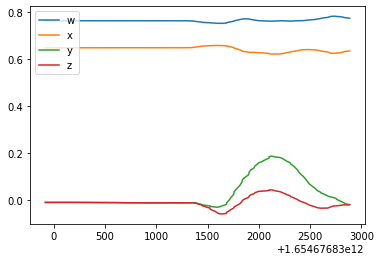

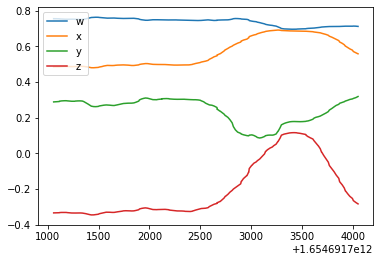

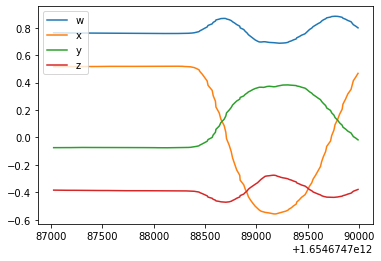

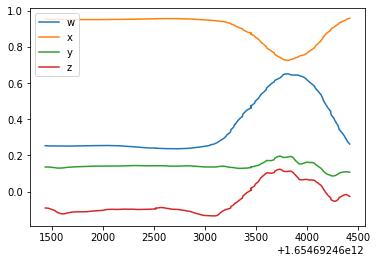

In [ ]:
plt.plot(data1c['w'], label="w")
plt.plot(data1c['x'], label='x')
plt.plot(data1c['y'], label='y')
plt.plot(data1c['z'], label='z')
plt.legend(loc="upper left")
plt.show()
plt.plot(data1w['w'], label="w")
plt.plot(data1w['x'], label='x')
plt.plot(data1w['y'], label='y')
plt.plot(data1w['z'], label='z')
plt.legend(loc="upper left")
plt.show()
plt.plot(data2c['w'], label="w")
plt.plot(data2c['x'], label='x')
plt.plot(data2c['y'], label='y')
plt.plot(data2c['z'], label='z')
plt.legend(loc="upper left")
plt.show()
plt.plot(data2w['w'], label="w")
plt.plot(data2w['x'], label='x')
plt.plot(data2w['y'], label='y')
plt.plot(data2w['z'], label='z')
plt.legend(loc="upper left")
plt.show()

In [ ]:
final_data = {'w1_min': [], 'w2_min': [], 'x1_min': [], 'x2_min': [], 'y1_min': [], 'y2_min': [], 'z1_min': [], 'z2_min': [], 'w1_max': [], 'w2_max': [], 'x1_max': [], 'x2_max': [], 'y1_max': [], 'y2_max': [], 'z1_max': [], 'z2_max': [], 'clt': []}
for i in range(44, 48):
  for j in range(1, 3):
    for k in range(1, 4):
      for l in range(1, 11):
        for m in range(1, 3):
          data = pd.read_json(str(i)+'/'+str(j)+'/set'+str(k)+'iter'+str(l)+'pos'+str(m)+'.json')
          final_data['w'+str(m)+'_min'].append(min(data.w))
          final_data['x'+str(m)+'_min'].append(min(data.x))
          final_data['y'+str(m)+'_min'].append(min(data.y))
          final_data['z'+str(m)+'_min'].append(min(data.z))
          final_data['w'+str(m)+'_max'].append(max(data.w))
          final_data['x'+str(m)+'_max'].append(max(data.x))
          final_data['y'+str(m)+'_max'].append(max(data.y))
          final_data['z'+str(m)+'_max'].append(max(data.z))
        if (i == 47):
          if (j == 1):
            final_data['clt'].append(1)
          else:
            final_data['clt'].append(3)
        elif (j == 1):
          final_data['clt'].append(0)
        else:
          final_data['clt'].append(2)
df = pd.DataFrame(final_data)
df.to_csv('blank.csv')

In [ ]:
print(df.clt.value_counts(0))

0    90
2    90
1    30
3    30
Name: clt, dtype: int64


In [ ]:
df = pd.read_csv('final_data.csv')

In [ ]:
y = df.clt
df.drop(columns=['clt'], inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#df_f= df.copy().dropna()
#train_df, test_df, y_train, y_test = train_test_split(
#    df.values, y, test_size=0.25, random_state=17
#)

In [ ]:
`preprocessor = Pipeline(
  [
    ("scaler", MinMaxScaler()),
    ("pca", PCA(n_components=2, random_state=42)),
  ]
)
clusterer = Pipeline(
  [
    (
      "kmeans",
      KMeans(
        n_clusters=4,
        init="k-means++",
        n_init=50,
        max_iter=500,
        random_state=42,
      ),
    ),
  ]
)
pipe = Pipeline(
  [
    ("preprocessor", preprocessor),
    ("clusterer", clusterer)
  ]
)
pipe.fit(df)
predicted_labels = pipe.predict(df)
preprocessed_data = pipe["preprocessor"].transform(df)
print(silhouette_score(preprocessed_data, predicted_labels))
adjusted_rand_score(y, predicted_labels)

0.7642143185585355


1.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


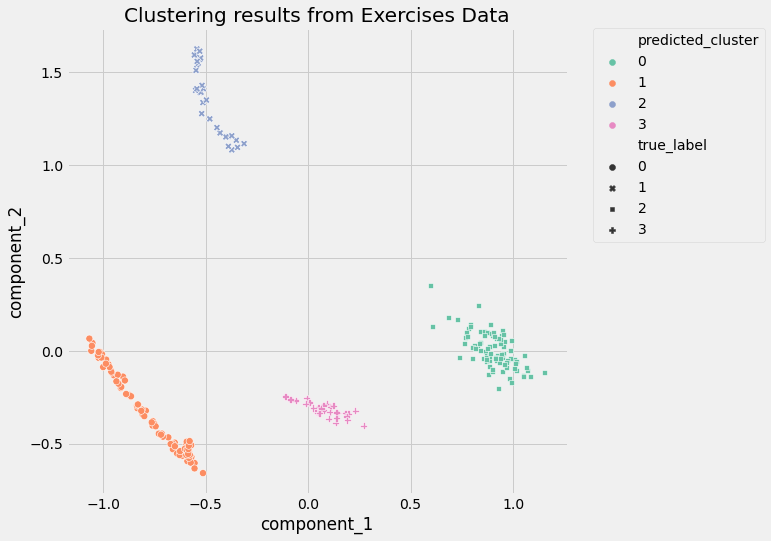

In [ ]:
pcadf = pd.DataFrame(
  preprocessed_data,
  columns=["component_1", "component_2"],
)
pcadf["predicted_cluster"] = predicted_labels
pcadf["true_label"] = y

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
  "component_1",
  "component_2",
  s=50,
  data=pcadf,
  hue="predicted_cluster",
  style="true_label",
  palette="Set2",
)

scat.set_title(
  "Clustering results from Exercises Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [ ]:
preprocessor = Pipeline(
  [
    ("scaler", MinMaxScaler()),
    ("pca", PCA(n_components=2, random_state=42)),
  ]
)
clusterer = Pipeline(
  [
    (
      "kmeans",
      KMeans(
        n_clusters=2,
        init="k-means++",
        n_init=50,
        max_iter=500,
        random_state=42,
      ),
    ),
  ]
)
pipe = Pipeline(
  [
    ("preprocessor", preprocessor),
    ("clusterer", clusterer)
  ]
)
pipe.fit(df)
predicted_labels = pipe.predict(df)
preprocessed_data = pipe["preprocessor"].transform(df)
print(silhouette_score(preprocessed_data, predicted_labels))
y2 = []

for x in y:
    def res(x): return x//2
    y2.append(res(x))
adjusted_rand_score(y2, predicted_labels)

0.585568984715892


0.9180605300206435

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


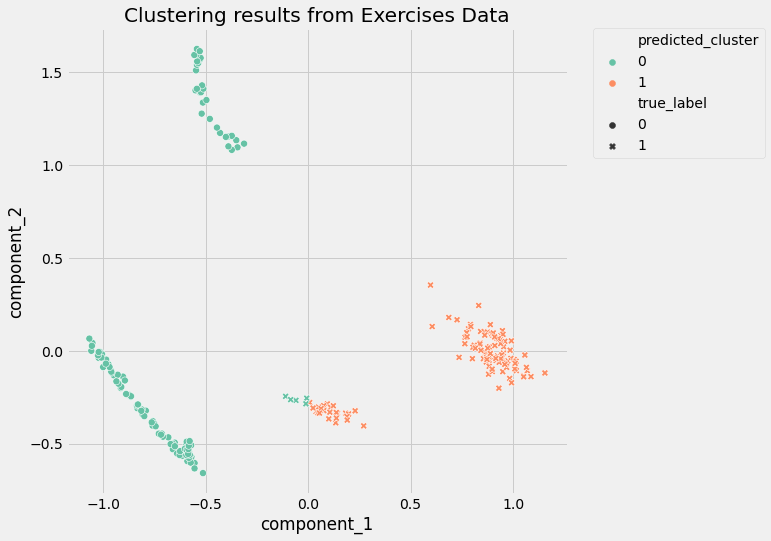

In [ ]:
pcadf = pd.DataFrame(
  preprocessed_data,
  columns=["component_1", "component_2"],
)
pcadf["predicted_cluster"] = predicted_labels
pcadf["true_label"] = y2

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
  "component_1",
  "component_2",
  s=50,
  data=pcadf,
  hue="predicted_cluster",
  style="true_label",
  palette="Set2",
)

scat.set_title(
  "Clustering results from Exercises Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()